In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [4]:
rejected = pd.read_csv('../../../Data/Rejected_DropNAs.csv')

In [5]:
rejected.isnull().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

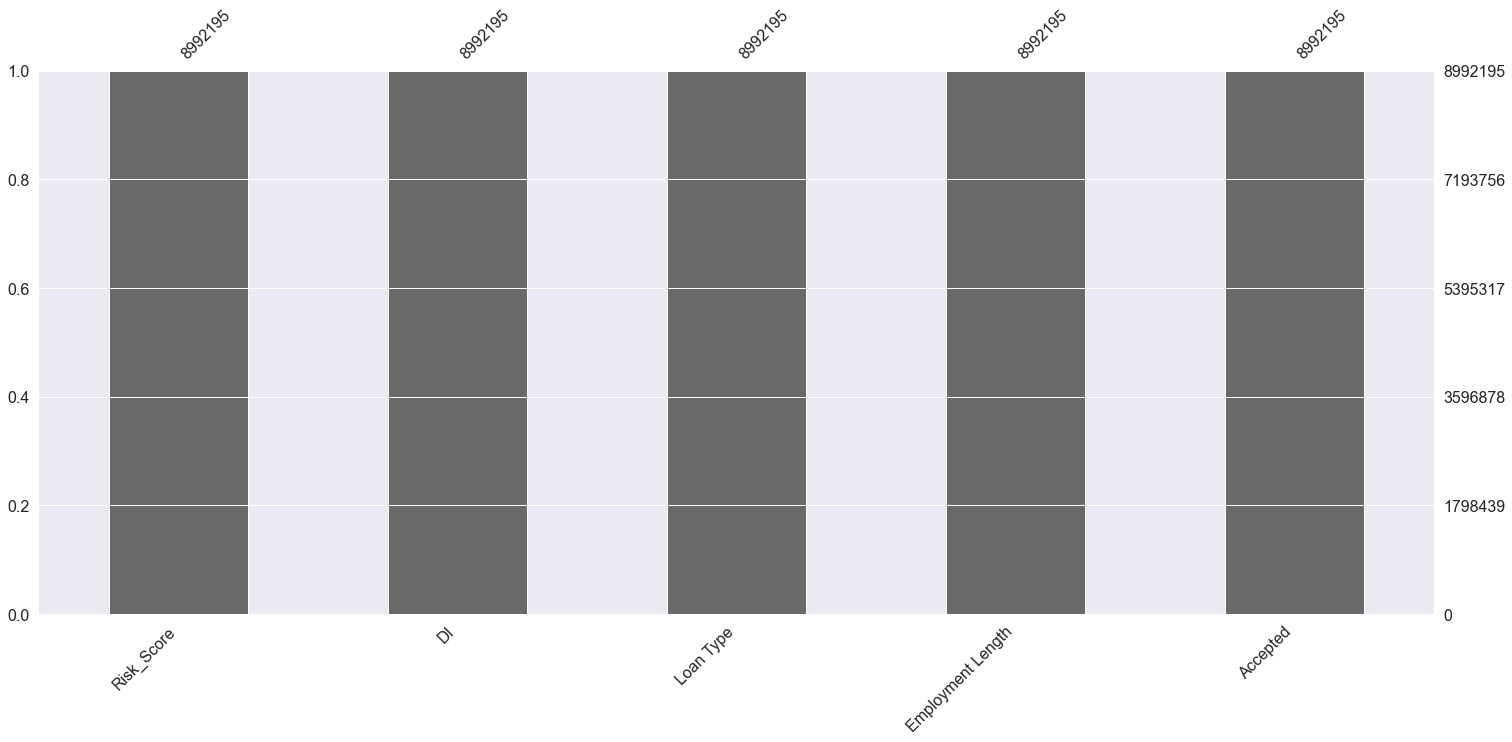

In [6]:
msnum.bar(rejected);

In [7]:
rejected

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,693.0,0.1000,Wedding Covered but No Honeymoon,4 years,0
1,703.0,0.1000,Consolidating Debt,< 1 year,0
2,715.0,0.1000,Want to consolidate my debt,1 year,0
3,698.0,0.3864,waksman,< 1 year,0
4,509.0,0.0943,mdrigo,< 1 year,0
...,...,...,...,...,...
8992190,681.0,0.5515,Debt Consolidation,< 1 year,0
8992191,531.0,0.3131,Debt Consolidation,< 1 year,0
8992192,590.0,0.4126,Debt Consolidation,< 1 year,0
8992193,686.0,0.1026,Other,< 1 year,0


In [8]:
rejected.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [9]:
accepted = pd.read_csv('../../../Data/Accepted_DropNAs.csv')

In [10]:
accepted

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.065455,Debt Consolidation,10+ years,1
1,717.0,0.380000,Business Loan,10+ years,1
2,697.0,0.317460,Home Improvement,10+ years,1
3,787.0,0.318182,Debt Consolidation,10+ years,1
4,697.0,0.099585,Major Purchase,3 years,1
...,...,...,...,...,...
2113752,667.0,0.252632,Home Improvement,7 years,1
2113753,697.0,0.222222,Debt Consolidation,10+ years,1
2113754,707.0,0.176211,Debt Consolidation,9 years,1
2113755,662.0,0.218182,Debt Consolidation,6 years,1


In [11]:
accepted.isnull().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [12]:
accepted.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [13]:
combo = pd.concat([accepted,rejected]).reset_index(drop=True)
combo

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.065455,Debt Consolidation,10+ years,1
1,717.0,0.380000,Business Loan,10+ years,1
2,697.0,0.317460,Home Improvement,10+ years,1
3,787.0,0.318182,Debt Consolidation,10+ years,1
4,697.0,0.099585,Major Purchase,3 years,1
...,...,...,...,...,...
11105947,681.0,0.551500,Debt Consolidation,< 1 year,0
11105948,531.0,0.313100,Debt Consolidation,< 1 year,0
11105949,590.0,0.412600,Debt Consolidation,< 1 year,0
11105950,686.0,0.102600,Other,< 1 year,0


In [14]:
combo.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [15]:
combo.describe()

,Risk_Score,DI,Accepted
count,1.110595e+07,1.110595e+07,1.110595e+07
mean,6.412543e+02,inf,1.903265e-01
std,8.703329e+01,NaN,3.925587e-01
min,0.000000e+00,-1.000000e-02,0.000000e+00
25%,6.040000e+02,9.990000e-02,0.000000e+00
50%,6.530000e+02,2.031000e-01,0.000000e+00
75%,6.870000e+02,3.455000e-01,0.000000e+00
max,9.900000e+02,inf,1.000000e+00


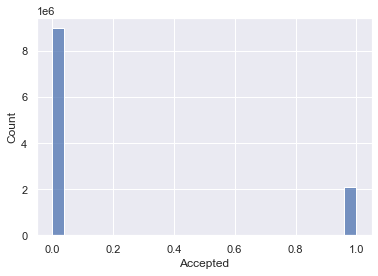

In [16]:
sns.histplot(data=combo, x='Accepted');

In [17]:
combo['Loan Type'].value_counts(dropna=False).nlargest(20)

Debt Consolidation         5357848
Credit Card Refinancing    1610219
Other                      1520792
Home Improvement            545830
Car Financing               488781
Major Purchase              305554
Medical Expenses            299139
Moving And Relocation       268144
Business Loan               257860
Home Purchase               183074
Vacation                    114960
Green Loan                   25056
Wedding                      20288
Personal Loan                 5206
Student Loan                  4913
Freedom                        411
Motorcycle Loan                262
debt free                      117
Credit card refinance          115
debt loan                      115
Name: Loan Type, dtype: int64

In [18]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [19]:
few.describe()

,Risk_Score,DI,Accepted
count,11106.000000,11106.000000,11106.000000
mean,642.076580,1.645695,0.190348
std,85.126083,45.359629,0.392593
min,0.000000,-0.010000,0.000000
25%,605.000000,0.099300,0.000000
50%,654.000000,0.200450,0.000000
75%,688.000000,0.345075,0.000000
max,951.000000,3204.000000,1.000000


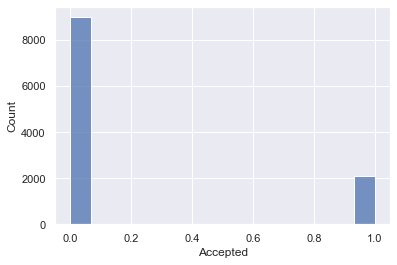

In [20]:
sns.histplot(data=few, x='Accepted');

In [21]:
few.isna().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [22]:
from pycaret.classification import *

In [23]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Employment Length', 'Loan Type'])

,Description,Value
0,session_id,1512
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11106, 5)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9675,0.9901,0.9236,0.9074,0.9153,0.8951,0.8953,0.0850
catboost,CatBoost Classifier,0.9579,0.9881,0.9142,0.8713,0.8920,0.8659,0.8665,0.4780
knn,K Neighbors Classifier,0.9537,0.9758,0.9128,0.8549,0.8825,0.8537,0.8547,0.0530
ada,Ada Boost Classifier,0.9493,0.9810,0.9007,0.8442,0.8711,0.8396,0.8406,0.0780
gbc,Gradient Boosting Classifier,0.9453,0.9785,0.9068,0.8243,0.8632,0.8291,0.8309,0.1940
rf,Random Forest Classifier,0.9397,0.9709,0.8682,0.8250,0.8458,0.8083,0.8090,0.1190
lr,Logistic Regression,0.9321,0.9634,0.8601,0.7996,0.8282,0.7860,0.7872,0.4200
et,Extra Trees Classifier,0.9295,0.9578,0.8365,0.8033,0.8190,0.7753,0.7759,0.1270
dt,Decision Tree Classifier,0.9266,0.8872,0.8236,0.7975,0.8102,0.7647,0.7650,0.0230
ridge,Ridge Classifier,0.9260,0.0000,0.8554,0.7784,0.8148,0.7687,0.7703,0.0230


In [25]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1512, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [26]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [27]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9820,0.9968,0.9527,0.9527,0.9527,0.9416,0.9416
1,0.9602,0.9862,0.8919,0.8980,0.8949,0.8703,0.8703
2,0.9704,0.9908,0.9324,0.9139,0.9231,0.9048,0.9049
3,0.9704,0.9943,0.9324,0.9139,0.9231,0.9048,0.9049
4,0.9562,0.9881,0.8784,0.8904,0.8844,0.8574,0.8574
5,0.9601,0.9869,0.9324,0.8679,0.8990,0.8742,0.8751
6,0.9640,0.9882,0.8919,0.9167,0.9041,0.8819,0.8821
7,0.9717,0.9884,0.9459,0.9091,0.9272,0.9096,0.9099
8,0.9730,0.9909,0.9459,0.9150,0.9302,0.9135,0.9137


In [28]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1512, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


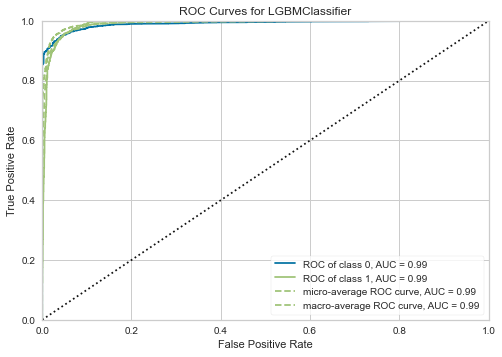

In [29]:
plot_model(lgbm, plot='auc')

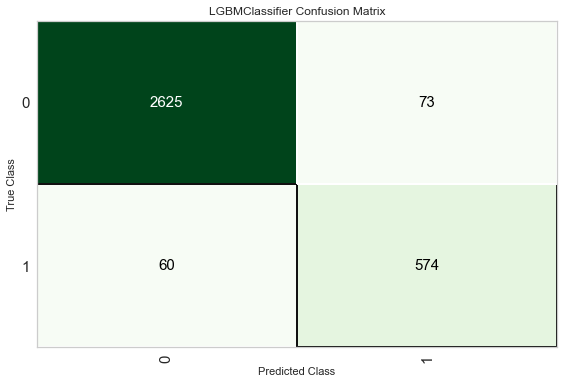

In [30]:
plot_model(lgbm, plot='confusion_matrix')

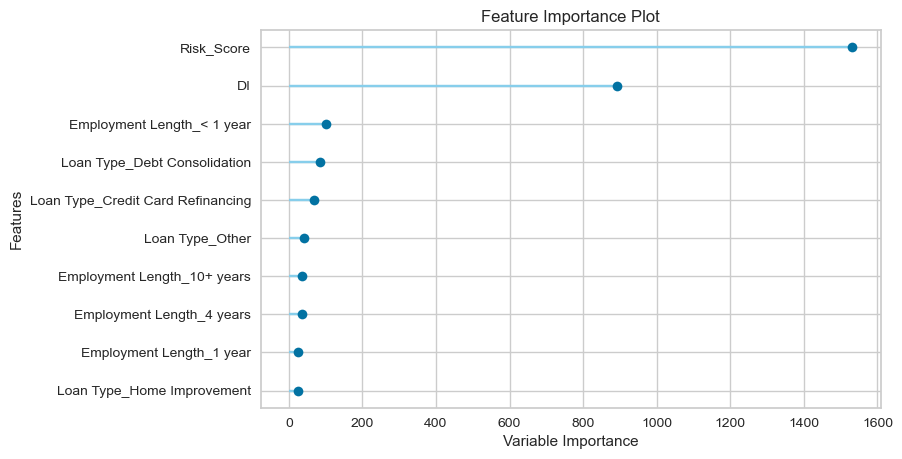

In [31]:
plot_model(lgbm, plot='feature')

In [32]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9640,0.9939,0.9392,0.8797,0.9085,0.8861,0.8869
1,0.9486,0.9818,0.8784,0.8553,0.8667,0.8348,0.8349
2,0.9679,0.9893,0.9324,0.9020,0.9169,0.8970,0.8972
3,0.9627,0.9920,0.9257,0.8839,0.9043,0.8812,0.8815
4,0.9459,0.9847,0.8784,0.8442,0.8609,0.8274,0.8276
5,0.9537,0.9861,0.9189,0.8500,0.8831,0.8543,0.8553
6,0.9511,0.9862,0.8581,0.8819,0.8699,0.8398,0.8399
7,0.9601,0.9892,0.9189,0.8774,0.8977,0.8729,0.8733
8,0.9653,0.9905,0.9527,0.8758,0.9126,0.8910,0.8922


In [33]:
print(cb)

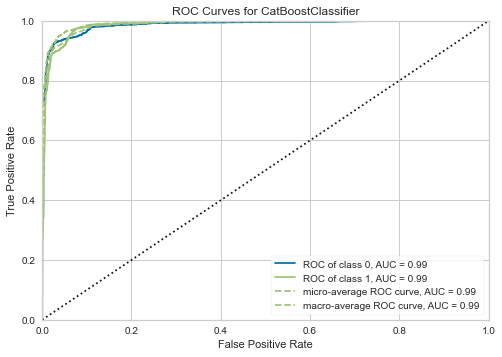

In [34]:
plot_model(cb, plot='auc')

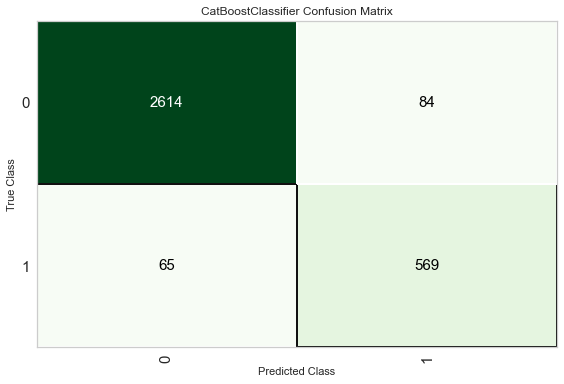

In [35]:
plot_model(cb, plot='confusion_matrix')

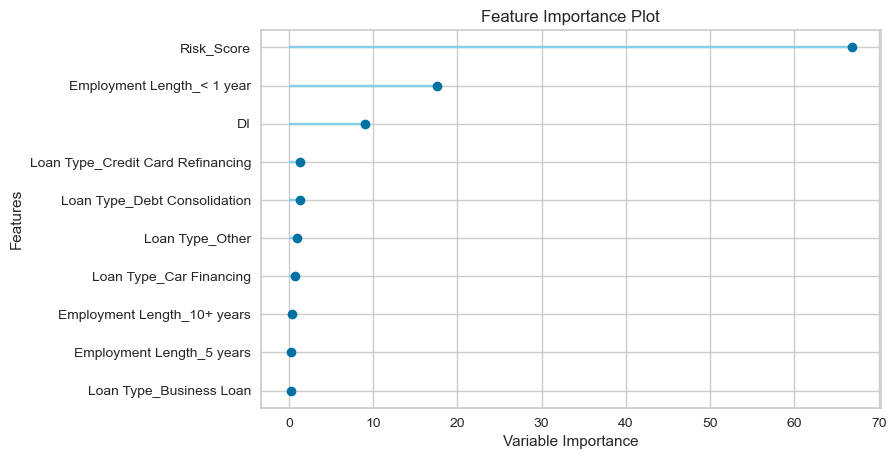

In [36]:
plot_model(cb, plot='feature')

In [ ]:
##Policy Code is internal way of assigning reject/accept/danger (0, 1, 2). 
##It's not available at time of application. 

In [ ]:
#State and Zip Code have no importance. 

In [ ]:
#Really not sure what "Application Date_is_month_start_1". It might just be the category 
#assigned to all Dates (all dates have a first month), and thereby not providing much informational value. 